##### AIND 2018 Term 1  Carl Wennstam



# Planning Project Report


- [Introduction](#introduction)
 - [State space](#state_space)
 - [Step cost](#step_cost)
 - [Search Algorithms](#search_algos)
 - [Heuristics](#heuristics)
- [Solutions](#solutions)
 - [Uninformed](#uninformed_solutions)
 - [Informed](#informed_solutions)
- [Complexity](#complexity)
 - [Uninformed](#informed_complexity)
 - [Informed](#informed_complexity)
- [Appendix](#appendix)






In [15]:
import pandas as pd
pd.options.display.float_format = '{:0.1f}'.format

import utils
from importlib import reload
reload(utils);

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#enable multi-variable printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

uninformed=[]
informed=[]
for p in range(1,4):
    u=dict()
    u['performance'],u['solution']=utils.load_results('uninformed',p)
    uninformed.append(u)

    i=dict()
    i['performance'],i['solution']=utils.load_results('informed',p)
    informed.append(i)

<module 'utils' from 'c:\\Users\\Administrator\\Documents\\GitHub\\AIND-Planning\\utils.py'>

<a id='introduction'></a>
## Introduction

<a id='state_space'></a>
### State space

**Problem 1** has a total off 10 initial fluent states, for a state space of $2^{10} = 1,024$.
The goal state contains only 2 fluents, meaning the others are Don't Care.

![title](p1/images/p1.svg)

Problems 2 and 3 are gradually larger, with state spaces of $2^{15} = 32,768$ and $2^{16} = 65,536$ respectively.
<a id='step_cost'></a>
### Step cost

A **solution** to a **planning problem** is a sequence of actions that leads from the initial state to the goal state.

An **optimal** solution is the solution with the **lowest path cost**, or

$$ S_{optimal} \equiv \arg \min_{S} \left( pathcost(S) \right) = \arg \min_{S} \left( length(S) \right) $$ 

, since we are assuming **unit step cost**. 

Solutions that are not optimal are sometimes referred to as **satisficing.**

<a id='search_algos'></a>
### Search algorithms

Five uninformed search algorithms were tested.

* **Breadth First Search (BFS)** expands the frontier/priority queue/open set and picks the latest added node. With a unit step cost like in this exercise, this will yeal the shortest path and optimal solution. Time complexity is high, $O(b^d)$

* **Uniform Cost Search (UCS)** stays optimal also for non-zero step costs. On the other hand, with unit step cost it will lag **BFS** by one expansion.  

* **Breadth First Tree Search (BFTS)** differs from standard **BFS** in that it does not consider where a node has been visited before,

* **Depth First Graph Search (DFGS)** is non-optimal since, as it will choose the longest path first it is *guaranteed* to return a longer solution when such a solution exists.

* **Depth Limited Search (DLS)* 

We also have three informed algorithms.

* **Greedy Best First Graph Search (GBFGS)**

* **A-Star (A*)** fixes problems with **Greedy Best First** by supplementing the heuristic $h(n)$, which can be thought of as the expected future cost, with $g(n)$, the path cost seen so far.

* **Recursive Best First Search (RBFS)**

<a id='heuristics'></a>
### Heuristics

* **H1** is not a true heuristic as it always returns ?.

* **Level sum (HPL)** returns  not a true heuristic as it always returns ?.

* **Ignore Preconditions (HIP)** is not a true heuristic as it always returns ?.

<a id='solution_quality'></a>
## Solution quality
<a id='solutions_uninformed'></a>
### Uninformed (blind) search
#### Problem 1
For Problem 1, all  **uninformed** search algorithms were able to find a solution.

In [79]:
#reload(utils)
df=uninformed[0]['performance'].sort_values(by=['length','expansions'])
p1_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p1_summary

length  optimal
problem algorithm                 algo                 
1       Breadth First Search      BFS        6     True
        Uniform Cost Search       UCS        6     True
        Breadth First Tree Search BFTS       6     True
        Depth First Graph Search  DFGS      20    False
        Depth Limited Search      DLS       50    False

* **BFS** found a solution of path cost = 6, which is an optimal solution. (Again, we know this since we know that **BFS** *always* yields an optimal solution.) 

* Apart from **BFS**, we also found optimal solutions with **UCS** and **Breadth First Tree Search (BFTS)**, whereas **Depth First Graph Search (DFGS)** and **Depth Limited Search (DFS)** returned suboptimal solutions, having path cost > 6 as expected. 

Below are the action sequences of the optimal solutions. 

In [19]:
df=uninformed[0]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6).T

,0,1,2,3,4,5
BFS,"Load(C1, P1, SFO)","Load(C2, P2, JFK)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"
BFTS,"Load(C1, P1, SFO)","Load(C2, P2, JFK)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"
UCS,"Load(C1, P1, SFO)","Load(C2, P2, JFK)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"


The **BFS/BFTS** solution is depicted graphically below, implemented in dot language.  

* *Load(P,C,A)* actions are shown as clockwise loop on A ending in a filled diamond.

* *Unload(P,C,A)* actions are shown as counter-clockwise loop on A ending in an unfilled diamond.

![title](p1/images/breadth_first.svg)

THe **UCS** solution is also optimal, with the same length but differing in the order of the actions: it flies both planes and then unloads both cargoes in parallel, whereas **BFS/BFTS** chose to finish one Load-Fly-Unload **high-level action** before starting the next. Now to compare this to the next best suboptimal solution found with **DFGS**.

![title](p1/images/depth_first_graph_search.svg)

#### Problem 2

With Problem 2, some of the blind search algorithm starts to struggle and only **BFS**, **UCS**, **DFGS** finished within the stated 10 min guideline. The optimal solution path cost is 9. Refer to Appendix for details on the action sequences of the optimal solution.

In [22]:
#reload(utils);
df=uninformed[1]['performance'].sort_values(by=['length','expansions'])
p2_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p2_summary

length  optimal
problem algorithm                algo                 
2       Breadth First Search     BFS        9     True
        Uniform Cost Search      UCS        9     True
        Depth First Graph Search DFGS     619    False

##### Problem 3

Similar to Problem 2, as optimal solution path cost increased to 12.

In [20]:
#reload(utils)
df=uninformed[2]['performance'].sort_values(by=['length','expansions'])
p3_summary=df.set_index(['problem','algorithm','algo'])[['length','optimal']]
p3_summary

length  optimal
problem algorithm                algo                 
3       Breadth First Search     BFS       12     True
        Uniform Cost Search      UCS       12     True
        Depth First Graph Search DFGS     392    False

### Informed search

We now look at our informed search algorithms.

#### Problem 1

In [104]:
#reload(utils)
df=informed[0]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
1       RBFS  H1              6     True
        GBFGS H1              6     True
        AS    HPL             6     True
              HIP             6     True
              H1              6     True

In [21]:
df=informed[0]['solution']
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6).T

,0,1,2,3,4,5
AS,"Load(C1, P1, SFO)","Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Fly(P2, JFK, SFO)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"
GBFGS,"Load(C1, P1, SFO)","Load(C2, P2, JFK)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"
RBFS,"Load(C2, P2, JFK)","Load(C1, P1, SFO)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"


In [105]:
df=informed[1]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
2       GBFGS H1             17    False
        AS    HPL             9     True
              HIP             9     True
              H1              9     True

In [23]:
df=informed[2]['performance'].sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])[['length','optimal']].sort_index(level=1,ascending=False)

length  optimal
problem algo  heuristic                 
3       GBFGS H1             22    False
        AS    HPL            12     True
              HIP            12     True
              H1             12     True

## Complexity
### Uninformed search
#### Problem 1

In [36]:
df=uninformed[0]['performance'].sort_values(by=['length','expansions']).drop(['heuristic'],axis=1)
df.set_index(['problem','algorithm','algo'])
#df.assign(b = lambda x: x.created**(1/x.length))

created  expansions  length  tests  \
problem algorithm                 algo                                       
1       Breadth First Search      BFS       180          43       6     56   
        Uniform Cost Search       UCS       224          55       6     57   
        Breadth First Tree Search BFTS     5960        1458       6   1459   
        Depth First Graph Search  DFGS       84          21      20     22   
        Depth Limited Search      DLS       414         101      50    271   

                                        time[s]  optimal  
problem algorithm                 algo                    
1       Breadth First Search      BFS       0.7     True  
        Uniform Cost Search       UCS       0.9     True  
        Breadth First Tree Search BFTS     23.9     True  
        Depth First Graph Search  DFGS      0.3    False  
        Depth Limited Search      DLS       2.2    False

##### Time complexity

**BFS** takes the shortest time among the optimal algorithms. 
**UCS** has similar performance but makes exactly 1 more test, as it tests on removing nodes rather than on adding them. 
**BFTS** shows horrible results, suffering from many redundant paths, but still ends up finding an optimal path.

There is a strong linear relationship between **expansions** and **execution time**. 

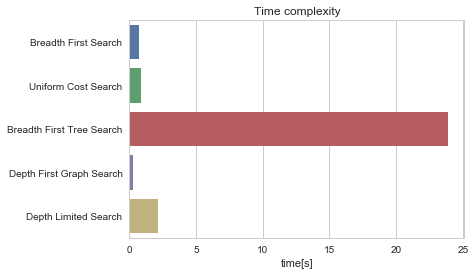

In [40]:
utils.barh("time[s]","algorithm", df)
plt.title('Time complexity');

##### Space complexity

Total number of nodes created. Several of the algorithms, including **BFS** are forced to keep all these nodes in memory throughout the search.

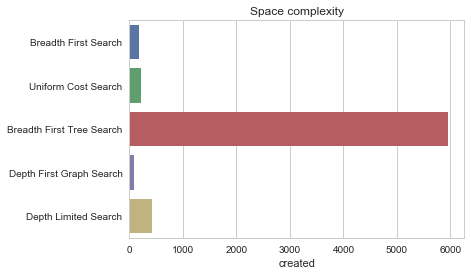

In [41]:
utils.barh("created","algorithm", df)
plt.title('Space complexity');

##### Space vs Time
Below is space vs time comppexity for the different algorithms (BFTS excluded).

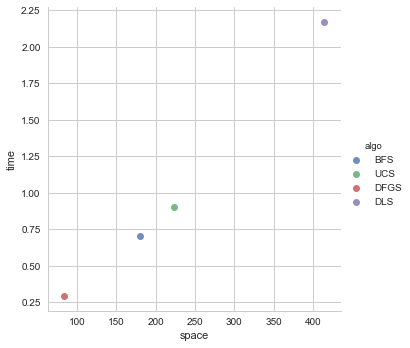

In [34]:
df=df[df.algo!='BFTS'].rename(columns={'time[s]':'time','created':'space'})
fig=sns.lmplot(x="space", y="time", data=df,fit_reg=False,hue='algo')

Performance summary for all three problems:

In [50]:
df=pd.concat([uninformed[p]['performance'].drop(['heuristic'],axis=1) for p in range(0,3)])
df.sort_values(by=['problem','length']).set_index(['problem','algorithm','algo'])

created  expansions  length  tests  \
problem algorithm                 algo                                       
1       Breadth First Search      BFS       180          43       6     56   
        Breadth First Tree Search BFTS     5960        1458       6   1459   
        Uniform Cost Search       UCS       224          55       6     57   
        Depth First Graph Search  DFGS       84          21      20     22   
        Depth Limited Search      DLS       414         101      50    271   
2       Breadth First Search      BFS     30509        3343       9   4609   
        Uniform Cost Search       UCS     44030        4852       9   4854   
        Depth First Graph Search  DFGS     5602         624     619    625   
3       Breadth First Search      BFS    129631       14663      12  18098   
        Uniform Cost Search       UCS    159716       18235      12  18237   
        Depth First Graph Search  DFGS     3364         408     392    409   

                                        time[s]  optimal  
problem algorithm                 algo                    
1       Breadth First Search      BFS       0.7     True  
        Breadth First Tree Search BFTS     23.9     True  
        Uniform Cost Search       UCS       0.9     True  
        Depth First Graph Search  DFGS      0.3    False  
        Depth Limited Search      DLS       2.2    False  
2       Breadth First Search      BFS      21.7     True  
        Uniform Cost Search       UCS      29.3     True  
        Depth First Graph Search  DFGS      6.2    False  
3       Breadth First Search      BFS    2612.8     True  
        Uniform Cost Search       UCS    2201.7     True  
        Depth First Graph Search  DFGS     85.9    False

### Informed search algorithms

Next we have the *informed* search algorithms.

In [61]:
df=informed[0]['performance'].drop('algorithm',axis=1).sort_values(by=['length','expansions'])
df.set_index(['problem','algo','heuristic'])

created  expansions  length  tests  time[s]  optimal
problem algo  heuristic                                                      
1       GBFGS H1              28           7       6      9      0.0     True
        AS    HPL             50          11       6     13      1.5     True
              HIP            170          41       6     43      0.1     True
              H1             224          55       6     57      0.1     True
        RBFS  H1           17023        4229       6   4230      4.9     True

##### Time complexity

**GBFGS** is by far the fastest here and still finds an optimal solution. 
**RBFS** seem completely unusable for this problem.

**A*** is more interesting as we can see an inverse relationship between time and space complexity. With the **H1** constant heuristic as the benchmark, we can see the incemental improvements to space complexity from the use of a proper heuristic **HPL** (levelsum)  

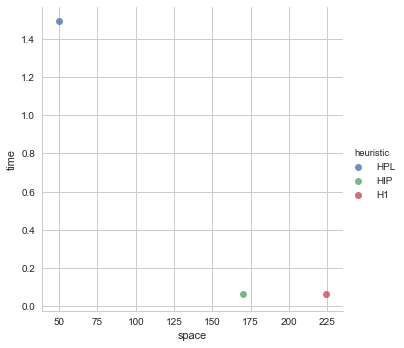

In [62]:
df=df[df.algo=='AS'].rename(columns={'time[s]':'time','created':'space'})
fig=sns.lmplot(x="space", y="time", data=df,fit_reg=False,hue='heuristic')

In [63]:
df=pd.concat([informed[p]['performance'].drop(['algorithm'],axis=1) for p in range(0,3)])
df.sort_values(by=['problem','length']).set_index(['problem','algo','heuristic'])

created  expansions  length  tests  time[s]  optimal
problem algo  heuristic                                                      
1       RBFS  H1           17023        4229       6   4230      4.9     True
        GBFGS H1              28           7       6      9      0.0     True
        AS    H1             224          55       6     57      0.1     True
              HIP            170          41       6     43      0.1     True
              HPL             50          11       6     13      1.5     True
2       AS    H1           44030        4852       9   4854     29.5     True
              HIP          13303        1450       9   1452      9.8     True
              HPL            841          86       9     88     86.1     True
        GBFGS H1            8910         990      17    992      6.0    False
3       AS    H1          159716       18235      12  18237   3094.8     True
              HIP          44944        5040      12   5042    960.9     True
              HPL           2934         318      12    320    430.8     True
        GBFGS H1           49429        5614      22   5616     47.5    False

## Appendix
### Optimal solutions

In [73]:
df=pd.concat([uninformed[0]['solution'],informed[0]['solution']])
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(6)

,AS,BFS,BFTS,GBFGS,RBFS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C2, P2, JFK)","Load(C1, P1, SFO)"
1,"Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Load(C2, P2, JFK)","Load(C2, P2, JFK)","Load(C1, P1, SFO)","Load(C2, P2, JFK)"
2,"Load(C2, P2, JFK)","Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)","Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)"
3,"Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)","Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)","Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)"
4,"Unload(C1, P1, JFK)","Fly(P1, SFO, JFK)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)","Fly(P1, SFO, JFK)","Unload(C1, P1, JFK)"
5,"Unload(C2, P2, SFO)","Unload(C1, P1, JFK)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)","Unload(C1, P1, JFK)","Unload(C2, P2, SFO)"


In [76]:
df=pd.concat([uninformed[1]['solution'],informed[1]['solution']])
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(9)

,AS,BFS,UCS
0,"Load(C1, P1, SFO)","Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Fly(P1, SFO, JFK)","Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Load(C2, P2, JFK)","Load(C3, P3, ATL)","Load(C3, P3, ATL)"
3,"Fly(P2, JFK, SFO)","Fly(P2, JFK, SFO)","Fly(P1, SFO, JFK)"
4,"Load(C3, P3, ATL)","Unload(C2, P2, SFO)","Fly(P2, JFK, SFO)"
5,"Fly(P3, ATL, SFO)","Fly(P1, SFO, JFK)","Fly(P3, ATL, SFO)"
6,"Unload(C3, P3, SFO)","Unload(C1, P1, JFK)","Unload(C3, P3, SFO)"
7,"Unload(C1, P1, JFK)","Fly(P3, ATL, SFO)","Unload(C1, P1, JFK)"
8,"Unload(C2, P2, SFO)","Unload(C3, P3, SFO)","Unload(C2, P2, SFO)"


In [77]:
df=pd.concat([uninformed[2]['solution'],informed[2]['solution']])
optimal=dict()
for i,v in df[df.optimal].iterrows():
    optimal[v.algo]=v.solution
pd.DataFrame.from_dict(optimal).head(12)

,AS,BFS,UCS
0,"Load(C2, P2, JFK)","Load(C1, P1, SFO)","Load(C1, P1, SFO)"
1,"Fly(P2, JFK, ORD)","Load(C2, P2, JFK)","Load(C2, P2, JFK)"
2,"Load(C4, P2, ORD)","Fly(P2, JFK, ORD)","Fly(P1, SFO, ATL)"
3,"Fly(P2, ORD, SFO)","Load(C4, P2, ORD)","Load(C3, P1, ATL)"
4,"Load(C1, P1, SFO)","Fly(P1, SFO, ATL)","Fly(P2, JFK, ORD)"
5,"Fly(P1, SFO, ATL)","Load(C3, P1, ATL)","Load(C4, P2, ORD)"
6,"Load(C3, P1, ATL)","Fly(P1, ATL, JFK)","Fly(P2, ORD, SFO)"
7,"Fly(P1, ATL, JFK)","Unload(C1, P1, JFK)","Fly(P1, ATL, JFK)"
8,"Unload(C4, P2, SFO)","Unload(C3, P1, JFK)","Unload(C4, P2, SFO)"
9,"Unload(C3, P1, JFK)","Fly(P2, ORD, SFO)","Unload(C3, P1, JFK)"
